In [1]:
import xarray as xr
import fsspec

### ERA5
url = 'https://storage.de.cloud.ovh.net/v1/AUTH_84d6da8e37fe4bb5aea18902da8c1170/uc1-africa/era5_africa_0d1_3hourly.zarr'
era5 = xr.open_zarr(fsspec.get_mapper(url), consolidated=True)

### ECMWF 
url = 'https://storage.de.cloud.ovh.net/v1/AUTH_84d6da8e37fe4bb5aea18902da8c1170/uc1-africa/ecmwf_africa_1d0_6hourly.zarr'
ecmwf = xr.open_zarr(fsspec.get_mapper(url), consolidated=True)

In [4]:
era5

,Array,Chunk
Bytes,35.51 GiB,4.46 MiB
Shape,"(14857, 801, 801)","(2920, 20, 20)"
Count,10087 Tasks,10086 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,35.51 GiB,4.46 MiB
Shape,"(14857, 801, 801)","(2920, 20, 20)"
Count,10087 Tasks,10086 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [2]:
ecmwf

<xarray.Dataset>
Dimensions:     (number: 51, time: 60, step: 719, latitude: 81, longitude: 81)
Coordinates:
  * latitude    (latitude) float64 40.0 39.0 38.0 37.0 ... -38.0 -39.0 -40.0
  * longitude   (longitude) float64 -25.0 -24.0 -23.0 -22.0 ... 53.0 54.0 55.0
  * number      (number) int64 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * step        (step) timedelta64[ns] 0 days 06:00:00 ... 179 days 18:00:00
    surface     float64 ...
  * time        (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2021-12-01
    valid_time  (time, step) datetime64[ns] dask.array<chunksize=(30, 719), meta=np.ndarray>
Data variables:
    e           (number, time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 719, 20, 20), meta=np.ndarray>
    msl         (number, time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 719, 20, 20), meta=np.ndarray>
    slhf        (number, time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 719, 20, 20), meta=np.ndarray>
    sshf        (number, time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 719, 20, 20), meta=np.ndarray>
    ssr         (number, time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 719, 20, 20), meta=np.ndarray>
    t2m         (number, time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 719, 20, 20), meta=np.ndarray>
    tp          (number, time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 719, 20, 20), meta=np.ndarray>

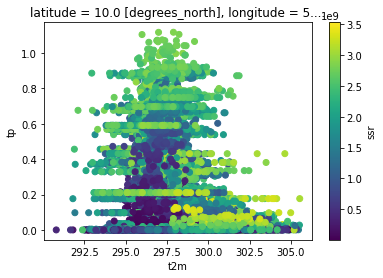

In [13]:
ecmwf.isel(number=10,longitude=30,latitude=30).plot.scatter(x="t2m",y="tp",hue="ssr")

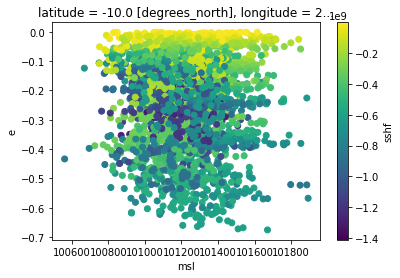

In [14]:
ecmwf.isel(number=30,longitude=50,latitude=50).plot.scatter(x="msl",y="e",hue="sshf")

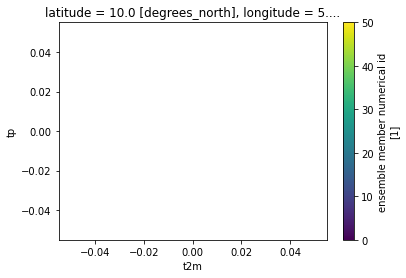

In [16]:
ecmwf.isel(longitude=30,latitude=30,step=10).plot.scatter(x="t2m",y="tp",hue="number")

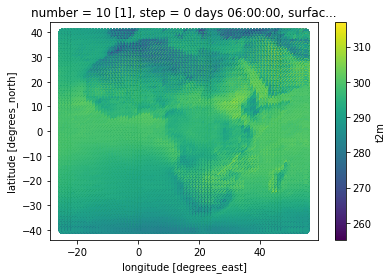

In [17]:
ecmwf.isel(number=10,step=0).plot.scatter(x="longitude",y="latitude",hue="t2m")

In [20]:
era5.isel(lon=200,lat=200).to_array().to_numpy()

array([[-1.7965212e-05, -9.6112490e-07, -1.8114224e-06, ...,
        -2.7316622e-05, -3.1142496e-05, -3.3693388e-05],
       [-5.6065321e-03, -3.1012297e-04, -5.5909157e-04, ...,
        -7.5474083e-03, -8.3565861e-03, -8.9507401e-03],
       [-4.4926000e+04, -2.4040000e+03, -4.5300000e+03, ...,
        -6.8314000e+04, -7.7880000e+04, -8.4260000e+04],
       ...,
       [ 9.6133500e+06,  0.0000000e+00,  0.0000000e+00, ...,
         1.0449336e+07,  1.0450336e+07,  1.0450336e+07],
       [ 2.8696515e+02,  2.8461160e+02,  2.8279883e+02, ...,
         3.0054565e+02,  2.9630609e+02,  2.9311874e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [11]:
aaa

<xarray.DataArray 'e' (time: 14857)>
dask.array<getitem, shape=(14857,), dtype=float32, chunksize=(2920,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 37.0
    lon      float32 -22.0
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T03:00:00 ... 2022-02-01